In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import skimage
import matplotlib.patches as patches


In [2]:
im = imageio.imread("sample.jpg")
print(im.shape)
print(type(im))
print(im.dtype)

(480, 640, 3)
<class 'imageio.core.util.Array'>
uint8


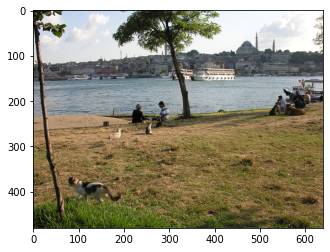

In [3]:
plt.imshow(im)
plt.show()

(785, 732)


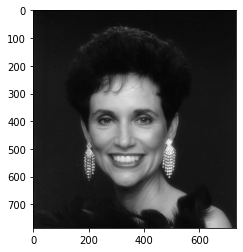

In [4]:
im_gray = imageio.imread("woman.png")
print(im_gray.shape)
plt.imshow(im_gray, cmap="gray")
plt.show()

In [5]:
np.random.seed(0)

In [6]:
mean = -10
sd = 0
shape = 480*640*3

In [7]:
noise = np.random.normal(mean,sd,shape)

In [8]:
noise

array([-10., -10., -10., ..., -10., -10., -10.])

In [9]:
noise = noise.reshape((480,640,3))

In [10]:
noise_img = im + noise
print(noise_img.dtype)

float64


In [11]:
noise_img = noise_img.astype(int)

In [12]:
noise_img = np.clip(noise_img, 0,255)

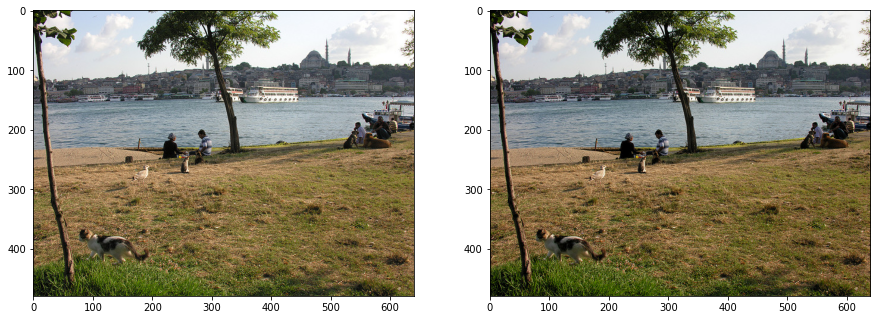

In [13]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.imshow(im)
ax2.imshow(noise_img)
plt.show()

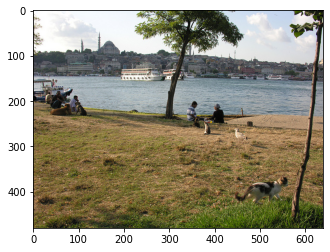

In [14]:
flip_im = np.fliplr(im)
plt.imshow(flip_im)
plt.show()

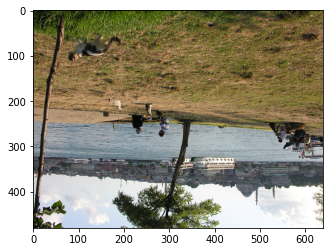

In [15]:
flip_up = np.flipud(im)
plt.imshow(flip_up)
plt.show()

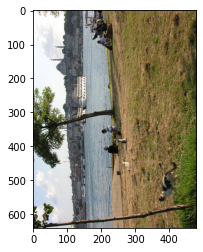

In [16]:
rotate90 = np.rot90(im)
plt.imshow(rotate90)
plt.show()

In [17]:
imageio.imwrite('noise_img.jpg', noise_img)

Lossy conversion from int64 to uint8. Range [0, 245]. Convert image to uint8 prior to saving to suppress this warning.


In [18]:
for i in range(3):
    print("mean of channel {} is - {}" .format(i, np.mean(im[:,:,i])))
    print("Variance of channel {} is - {}".format(i,np.var(im[:,:,i])))
    print("\n")

mean of channel 0 is - 132.2524609375
Variance of channel 0 is - 3801.416478318786


mean of channel 1 is - 126.22344401041667
Variance of channel 1 is - 3824.177696472127


mean of channel 2 is - 103.19472005208333
Variance of channel 2 is - 5532.065710403398




In [48]:
a=np.mean(im, axis=(0, 1))
b=np.var(im, axis=(0,1))
a[0]

132.2524609375

In [97]:
def plot_hist_channels(channel, bins):
    hist, bin_edges = np.histogram(im[:,:,channel], bins)
    width = 0.8 *  (bin_edges[1] - bin_edges[0])
    bin_centers =  (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.bar(bin_centers, hist, width=width)

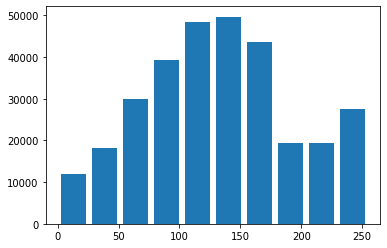

In [98]:
plot_hist_channels(channel=0,bins=10)

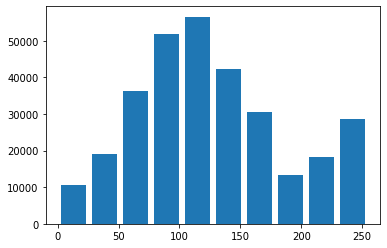

In [21]:
plot_hist_channels(channel=1, bins=10)

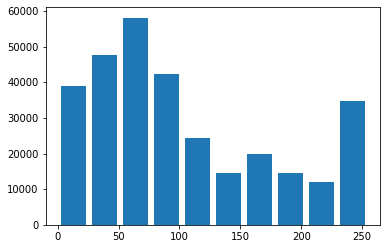

In [61]:
plot_hist_channels(channel=2, bins=10)

In [62]:
img = imageio.imread("sample.jpg")

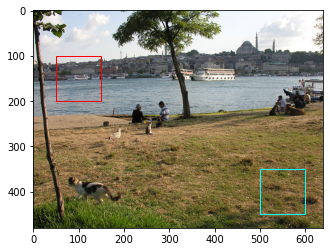

In [102]:
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img)

# Create a Rectangle patch
rect = patches.Rectangle((50,100),100,100,linewidth=1,edgecolor='r',facecolor='none')
rect1 = patches.Rectangle((500,350),100,100,linewidth=1,edgecolor='cyan',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect1)
plt.show()


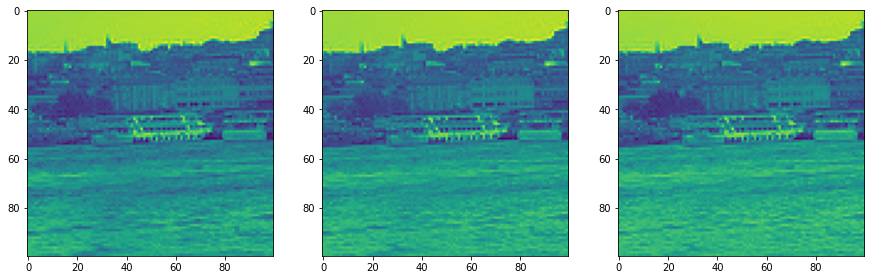

In [25]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(131)
ax2= f.add_subplot(132)
ax3= f.add_subplot(133)

ax.imshow(im[100:200,50:150,0])
ax2.imshow(im[100:200,50:150,1])
ax3.imshow(im[100:200,50:150,2])

plt.show()

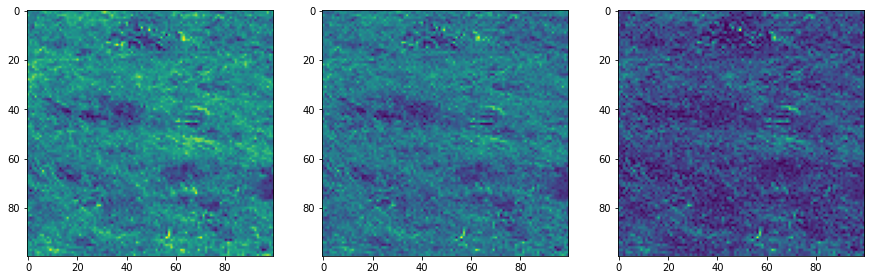

In [26]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(131)
ax2= f.add_subplot(132)
ax3= f.add_subplot(133)

ax.imshow(im[350:450,500:600,0])
ax2.imshow(im[350:450,500:600,1])
ax3.imshow(im[350:450,500:600,2])

plt.show()

In [27]:
new_bins = np.linspace(1,255,num=20)
new_bins

array([  1.        ,  14.36842105,  27.73684211,  41.10526316,
        54.47368421,  67.84210526,  81.21052632,  94.57894737,
       107.94736842, 121.31578947, 134.68421053, 148.05263158,
       161.42105263, 174.78947368, 188.15789474, 201.52631579,
       214.89473684, 228.26315789, 241.63157895, 255.        ])

# histogram for RGB values in red bounding box

In [28]:
hist_redbox0, bin_edges_redbox0 = np.histogram(im[100:200,50:150,0], bins=20)

In [29]:
width_redbox0 = 0.8 *  (bin_edges_redbox0[1] - bin_edges_redbox0[0])
bin_centers_redbox0 =  (bin_edges_redbox0[: -1] + bin_edges_redbox0[1:]) / 2
bin_centers_redbox0

array([  6.375,  19.125,  31.875,  44.625,  57.375,  70.125,  82.875,
        95.625, 108.375, 121.125, 133.875, 146.625, 159.375, 172.125,
       184.875, 197.625, 210.375, 223.125, 235.875, 248.625])

<BarContainer object of 20 artists>

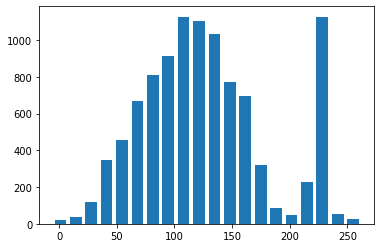

In [30]:
plt.bar(new_bins, hist_redbox0, width=width_redbox0)

<BarContainer object of 20 artists>

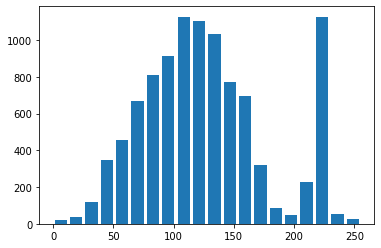

In [31]:
plt.bar(bin_centers_redbox0, hist_redbox0, width=width_redbox0)

In [32]:
hist_redbox1, bin_edges_redbox1 = np.histogram(im[100:200,50:150,1], bins=20)
width_redbox1 = 0.8 *  (bin_edges_redbox1[1] - bin_edges_redbox1[0])
bin_centers_redbox1 =  (bin_edges_redbox1[: -1] + bin_edges_redbox1[1:]) / 2

<BarContainer object of 20 artists>

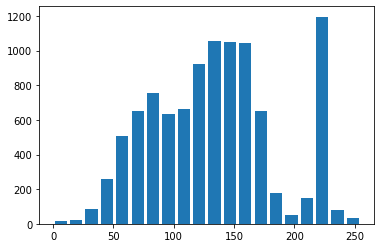

In [33]:
plt.bar(bin_centers_redbox1, hist_redbox1, width=width_redbox1)

<BarContainer object of 20 artists>

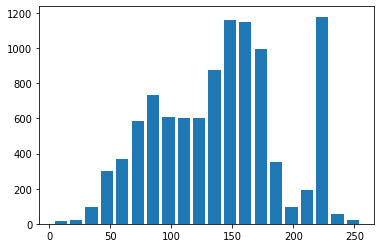

In [34]:
hist_redbox2, bin_edges_redbox2 = np.histogram(im[100:200,50:150,2], bins=20)
width_redbox2 = 0.8 *  (bin_edges_redbox2[1] - bin_edges_redbox2[0])
bin_centers_redbox2 =  (bin_edges_redbox2[: -1] + bin_edges_redbox2[1:]) / 2
plt.bar(bin_centers_redbox2, hist_redbox2, width=width_redbox2)

In [35]:
for i in range(3):
    print("mean of channel {} is - {}" .format(i, np.mean(im[100:200,50:150,i])))
    print("Variance of channel {} is - {}".format(i,np.var(im[100:200,50:150,i])))
    print("\n")

mean of channel 0 is - 126.4798
Variance of channel 0 is - 2666.3591919600003


mean of channel 1 is - 133.6194
Variance of channel 1 is - 2642.0391436399996


mean of channel 2 is - 139.5703
Variance of channel 2 is - 2580.11725791




# Histogram for RGB values in cyan box

<BarContainer object of 20 artists>

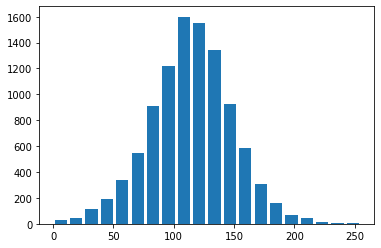

In [36]:
hist_cyanbox0, bin_edges_cyanbox0 = np.histogram(im[350:450,500:600,0], bins=20)
width_cyanbox0 = 0.8 *  (bin_edges_cyanbox0[1] - bin_edges_cyanbox0[0])
bin_centers_cyanbox0 =  (bin_edges_cyanbox0[: -1] + bin_edges_cyanbox0[1:]) / 2
plt.bar(bin_centers_cyanbox0, hist_cyanbox0, width=width_cyanbox0)

<BarContainer object of 20 artists>

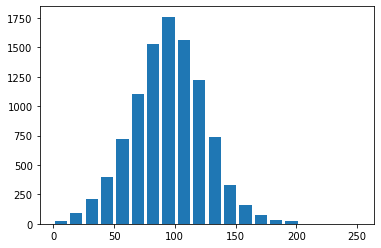

In [37]:
hist_cyanbox1, bin_edges_cyanbox1 = np.histogram(im[350:450,500:600,1], bins=20)
width_cyanbox1 = 0.8 *  (bin_edges_cyanbox1[1] - bin_edges_cyanbox1[0])
bin_centers_cyanbox1 =  (bin_edges_cyanbox1[: -1] + bin_edges_cyanbox1[1:]) / 2
plt.bar(bin_centers_cyanbox1, hist_cyanbox1, width=width_cyanbox1)

<BarContainer object of 20 artists>

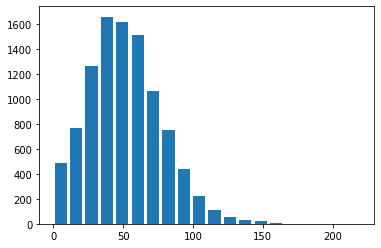

In [38]:
hist_cyanbox2, bin_edges_cyanbox2 = np.histogram(im[350:450,500:600,2], bins=20)
width_cyanbox2 = 0.8 *  (bin_edges_cyanbox2[1] - bin_edges_cyanbox2[0])
bin_centers_cyanbox2 =  (bin_edges_cyanbox2[: -1] + bin_edges_cyanbox2[1:]) / 2
plt.bar(bin_centers_cyanbox2, hist_cyanbox2, width=width_cyanbox2)

In [39]:
for i in range(3):
    print("mean of channel {} is - {}" .format(i, np.mean(im[350:450,500:600,i])))
    print("Variance of channel {} is - {}".format(i,np.var(im[350:450,500:600,i])))
    print("\n")

mean of channel 0 is - 114.1773
Variance of channel 0 is - 1167.57686471


mean of channel 1 is - 94.8437
Variance of channel 1 is - 917.4150703099999


mean of channel 2 is - 51.0018
Variance of channel 2 is - 700.8615967600001


